In [1]:
import pandas as pd
import requests
import time

In [31]:
wallets_df = pd.read_csv('Wallet_id.csv')  
wallets = wallets_df['wallet_id'].tolist()

In [3]:
ETHERSCAN_API_KEY = '96A2ZTHJRR6WEYG2YYT1HHZ7Z52AURSA63' 

In [4]:
def get_transactions(wallet):
    url = f"https://api.etherscan.io/api?module=account&action=txlist&address={wallet}&startblock=0&endblock=99999999&sort=asc&apikey={ETHERSCAN_API_KEY}"
    response = requests.get(url)
    data = response.json()
    if data['status'] == '1':
        return data['result']
    else:
        return []


In [5]:
all_data = {}
for wallet in wallets[:]:  # Extracting information from all wallets
    print(f"Fetching: {wallet}")
    txs = get_transactions(wallet)
    all_data[wallet] = txs
    time.sleep(1)  

Fetching: 0x0039f22efb07a647557c7c5d17854cfd6d489ef3
Fetching: 0x06b51c6882b27cb05e712185531c1f74996dd988
Fetching: 0x0795732aacc448030ef374374eaae57d2965c16c
Fetching: 0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9
Fetching: 0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae
Fetching: 0x104ae61d8d487ad689969a17807ddc338b445416
Fetching: 0x111c7208a7e2af345d36b6d4aace8740d61a3078
Fetching: 0x124853fecb522c57d9bd5c21231058696ca6d596
Fetching: 0x13b1c8b0e696aff8b4fee742119b549b605f3cbc
Fetching: 0x1656f1886c5ab634ac19568cd571bc72f385fdf7
Fetching: 0x1724e16cb8d0e2aa4d08035bc6b5c56b680a3b22
Fetching: 0x19df3e87f73c4aaf4809295561465b993e102668
Fetching: 0x1ab2ccad4fc97c9968ea87d4435326715be32872
Fetching: 0x1c1b30ca93ef57452d53885d97a74f61daf2bf4f
Fetching: 0x1e43dacdcf863676a6bec8f7d6896d6252fac669
Fetching: 0x22d7510588d90ed5a87e0f838391aaafa707c34b
Fetching: 0x24b3460622d835c56d9a4fe352966b9bdc6c20af
Fetching: 0x26750f1f4277221bdb5f6991473c6ece8c821f9d
Fetching: 0x27f72a000d8e9f324583f3a3491ea66998

In [6]:
import json
# Dumping all in one json file
with open("wallet_tx_data.json", "w") as f:
    json.dump(all_data, f)

In [34]:
import json
with open("wallet.json", "r") as f:
    raw_data=json.load(f)
# Flattening the json 
records = []
for wallet, txns in raw_data.items():
    for txn in txns:
        txn['wallet_id'] = wallet
        records.append(txn)

# Create DataFrame
df = pd.DataFrame(records)

# Save to CSV
df.to_csv("wallet_transactions.csv", index=False)
len(df)

6422

In [8]:
df1=pd.read_csv('wallet_transactions.csv')
df1.head()

,blockNumber,blockHash,timeStamp,hash,nonce,transactionIndex,from,to,value,gas,...,input,methodId,functionName,contractAddress,cumulativeGasUsed,txreceipt_status,gasUsed,confirmations,isError,wallet_id
0,3606695,0x3933a1503dfd71252ed989c8137cd888dc6f460a0eee...,1493254201,0x9da9da95c9c48d82a818d60e13c14981264bb8b8418b...,289758,37,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,200000000000000000,333333,...,0x,0x,NaN,NaN,962090,NaN,21000,19403072,0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3
1,3606709,0xb6de24eb2bfbcbcf439647755ae5382b09cef95769f7...,1493254443,0x48154e11e7844969545339b8328748bf05c49841674e...,0,71,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,0x9ae98746eb8a0aeee5ff2b6b15875313a986f103,7000000000000000,27961,...,0x338cdca1,0x338cdca1,request(),NaN,2094834,NaN,23301,19403058,0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3
2,3606713,0x2b96e45695f1db42ce79ad0433a282d35d14caaff35b...,1493254495,0xe17bf3ca4d4616c89c3cefba65077420eecac2e115fd...,1,22,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,0x9ae98746eb8a0aeee5ff2b6b15875313a986f103,7000000000000000,27961,...,0x338cdca1,0x338cdca1,request(),NaN,2683717,NaN,23301,19403054,0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3
3,3606717,0xf5b41d0a8d0617b1d4b2bdbbdcb5bde641b93d9e7081...,1493254558,0xaf10622c370d28f2e1f2631efbc02c35e296a7d6dbd1...,2,22,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,0x9ae98746eb8a0aeee5ff2b6b15875313a986f103,0,61078,...,0x797af6271f6c8b760228ef69a00bea01f72146a5e5ce...,0x797af627,confirm(bytes32 _h),NaN,752334,NaN,35898,19403050,0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3
4,3622170,0x2849e6679136438e43daf9484c7a1b15d5159cda01a6...,1493490509,0x42e2cf2103643a349594a0135d5842e02f643ba578e7...,3,115,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,0x0b8d56c26d8cf16fe1bddf4967753503d974de06,20000000000000000,120763,...,0x29cbdc860000000000000000000000000039f22efb07...,0x29cbdc86,"buyin(address _who, uint256 _maxPrice)",NaN,2981051,NaN,100636,19387597,0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3


In [9]:
df1.isnull().sum()

blockNumber             0
blockHash               0
timeStamp               0
hash                    0
nonce                   0
transactionIndex        0
from                    0
to                     70
value                   0
gas                     0
gasPrice                0
input                   0
methodId                0
functionName         1553
contractAddress      6352
cumulativeGasUsed       0
txreceipt_status       83
gasUsed                 0
confirmations           0
isError                 0
wallet_id               0
dtype: int64

In [10]:
df1.columns

Index(['blockNumber', 'blockHash', 'timeStamp', 'hash', 'nonce',
       'transactionIndex', 'from', 'to', 'value', 'gas', 'gasPrice', 'input',
       'methodId', 'functionName', 'contractAddress', 'cumulativeGasUsed',
       'txreceipt_status', 'gasUsed', 'confirmations', 'isError', 'wallet_id'],
      dtype='object')

## Preprocessing

In [11]:
# Preprocessing
df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s', errors='coerce')
df = df[df['isError'] != '1']
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['gasPrice'] = pd.to_numeric(df['gasPrice'], errors='coerce')

C:\Users\Bhumika Shankar\AppData\Local\Temp\ipykernel_17624\2794584610.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s', errors='coerce')


## Feature Extraction

In [12]:
# Group by each wallet
groups = df.groupby('wallet_id')

# Feature extraction
features_df = pd.DataFrame()

features_df['txn_count'] = groups.size()
features_df['total_value'] = groups['value'].sum()
features_df['avg_value'] = groups['value'].mean()
features_df['unique_counterparties'] = groups.apply(lambda g: g['to'].nunique() + g['from'].nunique())
features_df['avg_gas_price'] = groups['gasPrice'].mean()
features_df['first_txn'] = groups['timeStamp'].min()
features_df['last_txn'] = groups['timeStamp'].max()

features_df['active_days'] = (features_df['last_txn'] - features_df['first_txn']).dt.days + 1
features_df['txn_per_day'] = features_df['txn_count'] / features_df['active_days']

In [13]:
# Drop helper columns
features_df.drop(columns=['first_txn', 'last_txn'], inplace=True)
features_df.fillna(0, inplace=True)

In [14]:
features_df.head()

,txn_count,total_value,avg_value,unique_counterparties,avg_gas_price,active_days,txn_per_day
wallet_id,,,,,,,
0x0039f22efb07a647557c7c5d17854cfd6d489ef3,1896,8.377115e+21,4.418309e+18,461,6.232860e+10,2514,0.754177
0x06b51c6882b27cb05e712185531c1f74996dd988,4,2.430185e+16,6.075462e+15,6,5.550000e+10,1,4.000000
0x0795732aacc448030ef374374eaae57d2965c16c,3,1.860000e+16,6.200000e+15,5,5.600000e+10,1,3.000000
0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9,24,2.017835e+20,8.407646e+18,17,4.229911e+10,1880,0.012766
0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae,4,2.600469e+16,6.501173e+15,6,5.242500e+10,64,0.062500


## Model Training

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
# Select multiple features (must be 2D)
X = features_df[['txn_count', 'total_value', 'unique_counterparties', 'txn_per_day']]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
features_df['cluster'] = clusters

c:\users\bhumika shankar\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
cluster_means = features_df.groupby('cluster')['total_value'].mean().sort_values()
score_map = {cluster: int(score) for cluster, score in zip(cluster_means.index, [200, 400, 700, 1000])}
features_df['credit_score'] = features_df['cluster'].map(score_map)

In [42]:
features_df.tail()

,txn_count,total_value,avg_value,unique_counterparties,avg_gas_price,active_days,txn_per_day,cluster,score,credit_score
wallet_id,,,,,,,,,,
0xf60304b534f74977e159b2e159e135475c245526,10,0.000000e+00,0.000000e+00,7,2.998400e+10,45,0.222222,1,400,400
0xf67e8e5805835465f7eba988259db882ab726800,3,1.600000e+16,5.333333e+15,5,4.233333e+10,8,0.375000,1,400,400
0xf7aa5d0752cfcd41b0a5945867d619a80c405e52,3,1.860000e+16,6.200000e+15,5,2.333333e+10,1,3.000000,0,200,200
0xf80a8b9cfff0febf49914c269fb8aead4a22f847,1,1.010039e+17,1.010039e+17,2,6.000000e+10,1,1.000000,1,400,400
0xfe5a05c0f8b24fca15a7306f6a4ebb7dcf2186ac,3,1.860000e+16,6.200000e+15,5,4.733333e+10,1,3.000000,0,200,200


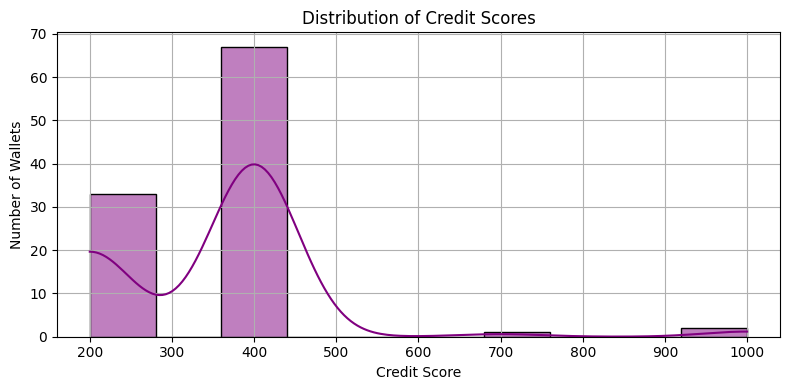

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(features_df['credit_score'], bins=10, kde=True, color='purple')
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Number of Wallets")
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
selected_df = features_df.reset_index()[["wallet_id", "credit_score"]]

In [91]:
selected_df.head()

,wallet_id,credit_score
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,700
1,0x06b51c6882b27cb05e712185531c1f74996dd988,200
2,0x0795732aacc448030ef374374eaae57d2965c16c,200
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9,400
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae,400


In [92]:
selected_df.to_csv('final_csv.csv',index=False)